In [734]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [735]:
# GPU setting

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#print(torch.cuda.get_device_name(0)) #Google colab = TESLA T4

In [736]:
 # Data load

df = pd.read_csv('경기도_clustered.csv',index_col = 0,encoding = 'cp949')
df = df.T
df

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,이천시,안성시,김포시,화성시,광주시,양주시,여주시,포천시,의왕시,오산시
2013-01-01,63.40000,67.80000,77.70000,60.50000,68.10000,53.00000,92.60000,92.60000,66.80000,69.50000,...,89.20000,92.60000,71.10000,73.00000,82.40000,82.00000,102.80000,93.60000,59.70000,83.20000
2013-02-01,63.30000,67.20000,77.40000,60.20000,67.70000,52.90000,92.50000,90.90000,66.60000,69.00000,...,89.40000,92.80000,70.90000,72.90000,82.00000,81.70000,102.80000,93.60000,59.10000,83.00000
2013-03-01,63.20000,66.90000,76.90000,60.00000,67.40000,52.60000,92.40000,90.10000,66.30000,68.60000,...,89.70000,92.80000,70.80000,72.80000,81.90000,81.40000,102.70000,93.60000,58.70000,82.90000
2013-04-01,63.30000,67.10000,76.40000,59.80000,67.40000,52.60000,92.40000,90.00000,66.30000,68.10000,...,90.10000,93.50000,70.70000,73.20000,82.30000,81.70000,102.70000,93.90000,58.60000,82.90000
2013-05-01,63.40000,67.50000,76.40000,59.60000,67.60000,52.90000,92.40000,89.80000,66.60000,68.10000,...,90.40000,93.80000,71.00000,73.60000,82.30000,81.90000,103.60000,94.70000,58.80000,82.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,109.50000,104.80000,107.20000,111.70000,110.20000,107.30000,113.20000,107.70000,110.70000,107.60000,...,110.30000,114.80000,105.30000,111.60000,107.90000,109.50000,106.60000,108.40000,112.90000,115.90000
2021-12-01,109.80000,105.10000,107.40000,112.00000,110.80000,107.40000,114.10000,107.50000,111.20000,108.00000,...,112.30000,116.10000,105.60000,111.60000,108.40000,109.80000,107.20000,109.00000,113.00000,116.70000
2022-01-01,109.80000,105.10000,107.40000,111.80000,110.80000,107.30000,114.30000,107.50000,111.30000,108.10000,...,113.30000,116.90000,105.60000,111.50000,108.70000,109.80000,107.10000,109.20000,113.00000,116.80000
2022-02-01,109.60000,105.00000,107.30000,111.60000,110.70000,107.30000,114.30000,107.40000,111.30000,108.00000,...,114.20000,117.00000,105.60000,111.00000,108.70000,109.70000,107.10000,109.30000,112.90000,116.60000


In [737]:
data = pd.read_csv('경기도변수.csv',index_col = 0)
data


,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
date,,,,,,,,,,,,,,,,
2013-01-01,73.50000,64.75625,93.90000,80.10000,102.86800,92.72800,5.78000,82.68933,76.00764,1089.00000,1841.10000,1961.90000,503.67000,8413721.00000,54632,13631
2013-02-01,73.20000,64.42500,93.66667,79.80000,90.00900,93.03800,5.66000,82.87118,76.10804,1083.00000,1857.10000,2026.50000,535.87000,7268443.00000,65640,14925
2013-03-01,73.10000,64.22500,93.55000,79.60000,101.38800,92.95200,5.54000,83.16272,76.37669,1111.00000,1862.40000,2004.90000,555.02000,10160177.00000,87563,17718
2013-04-01,73.20000,64.30000,93.76667,79.50000,101.29500,92.82300,5.42000,83.55404,76.85819,1101.00000,1867.70000,1964.00000,563.87000,9757932.00000,106498,22790
2013-05-01,73.40000,64.49375,94.11667,79.60000,102.31300,92.82300,5.24000,83.79708,77.09053,1129.70000,1870.30000,2001.05000,577.87000,10837979.00000,120393,25910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,103.50000,107.45625,108.65000,108.80000,114.80000,103.35000,3.47000,102.45093,103.90395,1168.60000,3543.40000,2970.68000,992.33000,14689855.00000,119686,29187
2021-11-01,104.10000,108.45625,110.16667,109.80000,119.30000,103.87000,3.58000,102.91790,104.54323,1187.90000,3594.70000,2839.01000,965.63000,14483042.00000,111172,26593
2021-12-01,104.40000,108.79375,111.03333,110.20000,126.70000,104.04000,3.68000,103.17831,104.79809,1188.80000,3620.10000,2977.65000,1033.98000,19169150.00000,101766,25669


In [738]:
train = data.copy()
train 

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
date,,,,,,,,,,,,,,,,
2013-01-01,73.50000,64.75625,93.90000,80.10000,102.86800,92.72800,5.78000,82.68933,76.00764,1089.00000,1841.10000,1961.90000,503.67000,8413721.00000,54632,13631
2013-02-01,73.20000,64.42500,93.66667,79.80000,90.00900,93.03800,5.66000,82.87118,76.10804,1083.00000,1857.10000,2026.50000,535.87000,7268443.00000,65640,14925
2013-03-01,73.10000,64.22500,93.55000,79.60000,101.38800,92.95200,5.54000,83.16272,76.37669,1111.00000,1862.40000,2004.90000,555.02000,10160177.00000,87563,17718
2013-04-01,73.20000,64.30000,93.76667,79.50000,101.29500,92.82300,5.42000,83.55404,76.85819,1101.00000,1867.70000,1964.00000,563.87000,9757932.00000,106498,22790
2013-05-01,73.40000,64.49375,94.11667,79.60000,102.31300,92.82300,5.24000,83.79708,77.09053,1129.70000,1870.30000,2001.05000,577.87000,10837979.00000,120393,25910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,103.50000,107.45625,108.65000,108.80000,114.80000,103.35000,3.47000,102.45093,103.90395,1168.60000,3543.40000,2970.68000,992.33000,14689855.00000,119686,29187
2021-11-01,104.10000,108.45625,110.16667,109.80000,119.30000,103.87000,3.58000,102.91790,104.54323,1187.90000,3594.70000,2839.01000,965.63000,14483042.00000,111172,26593
2021-12-01,104.40000,108.79375,111.03333,110.20000,126.70000,104.04000,3.68000,103.17831,104.79809,1188.80000,3620.10000,2977.65000,1033.98000,19169150.00000,101766,25669


In [739]:
train.corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.00000,0.90937,0.22791,0.77387,0.65565,0.98536,-0.78876,0.82194,0.83350,0.51119,0.98395,0.71342,0.80426,0.12069,0.27725,0.46107
Avg_1,0.90937,1.00000,0.43014,0.95232,0.65904,0.91431,-0.73825,0.85927,0.86416,0.45403,0.95073,0.82543,0.85191,0.21349,0.14592,0.22341
Avg_2,0.22791,0.43014,1.00000,0.63663,0.26381,0.31619,-0.26385,0.62986,0.60502,0.12227,0.25843,0.40436,0.41053,0.46749,-0.12229,-0.11360
Avg_3,0.77387,0.95232,0.63663,1.00000,0.61770,0.80261,-0.59546,0.82992,0.82501,0.35248,0.82588,0.83377,0.80558,0.25581,-0.00010,0.04684
MMI,0.65565,0.65904,0.26381,0.61770,1.00000,0.64364,-0.50888,0.59033,0.59217,0.22583,0.66092,0.59047,0.57564,0.37032,0.31797,0.35594
CPI,0.98536,0.91431,0.31619,0.80261,0.64364,1.00000,-0.78866,0.86051,0.86782,0.47790,0.97765,0.73679,0.80020,0.13549,0.25272,0.43478
대출금리,-0.78876,-0.73825,-0.26385,-0.59546,-0.50888,-0.78866,1.00000,-0.88344,-0.89777,-0.55747,-0.82740,-0.57529,-0.73038,-0.41693,-0.54202,-0.61100
전세가격지수 전국,0.82194,0.85927,0.62986,0.82992,0.59033,0.86051,-0.88344,1.00000,0.99877,0.44409,0.85400,0.73851,0.83238,0.45508,0.31973,0.41120
전세가격지수 경기도,0.83350,0.86416,0.60502,0.82501,0.59217,0.86782,-0.89777,0.99877,1.00000,0.46612,0.86609,0.73232,0.83338,0.44888,0.33749,0.42914
환율,0.51119,0.45403,0.12227,0.35248,0.22583,0.47790,-0.55747,0.44409,0.46612,1.00000,0.52514,0.03280,0.22826,0.16604,0.12524,0.22564


In [740]:
# Training/Test ratio = 7:3

Train_ratio = 0.7

Test_ratio = 0.3

In [741]:
result =  pd.DataFrame(data=[0,0,0,0],
                             index = ['MAE','RMSE','MAPE', 'R2'],
                             columns=['test'])
result

,test
MAE,0
RMSE,0
MAPE,0
R2,0


In [751]:
for i in range(2):
    cluster = int(df[df.columns[i]][-1])
    answer = []
    for num in range(11):
        if abs(train.corr()['Avg_{}'.format(cluster+1)][num])>=0.7:
            answer.append(num)
    
    col =[]
    for j in  answer:
        col.append(train.columns[j])
    
    
    x = train[col].replace(',','')
    y = df.iloc[:-1,i:i+1]
    
       
    train_x = x.iloc[0:int(len(x)*Train_ratio),:]

    train_y = y.iloc[0:int(len(x)*Train_ratio),:]

    test_x = x.iloc[int(len(x)*Train_ratio):,:]

    test_y = y.iloc[int(len(x)*Train_ratio):,:]
    

    
    

    # Normalizing , 둘다 학습하여 성능비교할것

    minmax = MinMaxScaler()

    standard = StandardScaler()

    
    yscaler = minmax.fit(y.values.reshape(-1,1))
    train_x = minmax.fit_transform(train_x)

    train_y = minmax.fit_transform(train_y)

    test_x = minmax.fit_transform(test_x)

    test_y = minmax.fit_transform(test_y)





    # Numpy array상태로는 학습이 불가능하므로, Torch Variable 형태로 변경(data/grad/grad_fn)

    train_x_tensor = Variable(torch.Tensor(train_x))

    train_y_tensor = Variable(torch.Tensor(train_y))

    

    test_x_tensor = Variable(torch.Tensor(test_x))

    test_y_tensor = Variable(torch.Tensor(test_y))

    

    train_x_tensor_final = torch.reshape(train_x_tensor, (train_x_tensor.shape[0], 1, train_x_tensor.shape[1]))

    train_y_tensor_final = torch.reshape(train_y_tensor, (train_y_tensor.shape[0], 1, train_y_tensor.shape[1]))

    test_x_tensor_final = torch.reshape(test_x_tensor, (test_x_tensor.shape[0], 1, test_x_tensor.shape[1]))

    test_y_tensor_final = torch.reshape(test_y_tensor,(test_y_tensor.shape[0], 1, test_y_tensor.shape[1]) )

    


    ## LSTM network modeling

    class LSTM_Jun(nn.Module):

        def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) : 

            super(LSTM_Jun, self).__init__()

            self.num_classes = num_classes

            self.num_layers = num_layers

            self.input_size = input_size

            self.hidden_size = hidden_size

            self.seq_length = seq_length

            self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)

            self.layer_1 = nn.Linear(hidden_size, 256)

            self.layer_2 = nn.Linear(256,256)

            self.layer_3 = nn.Linear(256,128)

            self.layer_out = nn.Linear(128, num_classes)

            self.relu = nn.ReLU() #Activation Func



        def forward(self,x):

            h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Hidden State

            c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Internal Process States



            output, (hn, cn) = self.lstm(x, (h_0, c_0))



            hn = hn.view(-1, self.hidden_size) # Reshaping the data for starting LSTM network

            out = self.relu(hn) #pre-processing for first layer

            out = self.layer_1(out) # first layer

            out = self.relu(out) # activation func relu

            out = self.layer_2(out)

            out = self.relu(out)

            out = self.layer_3(out)

            out = self.relu(out)

            out = self.layer_out(out) #Output layer

            return out

 

    # Code Main

    num_epochs = 500
    learning_rate = 0.005

    input_size = int(len(x.columns))

    hidden_size = 2 # number of features in hidden state

    num_layers = 1

    num_classes = int(len(y.columns))



    LSTM_Jun = LSTM_Jun(num_classes, input_size, hidden_size, num_layers, train_x_tensor_final.shape[1]).to(device)



    loss_function = torch.nn.MSELoss()

    optimizer = torch.optim.Adam(LSTM_Jun.parameters(), lr = learning_rate)

 

    for epoch in range(num_epochs) : 

        outputs = LSTM_Jun.forward(train_x_tensor_final.to(device))

        optimizer.zero_grad()

        loss = loss_function(outputs, train_y_tensor.to(device))

        loss.backward()

        optimizer.step() # improve from loss = back propagation

        if epoch % 100 == 0 :

            print("Epoch : %d, loss : %1.5f" % (epoch, loss.item()))
            

    # Estimated Value

    test_predict = LSTM_Jun(test_x_tensor_final.to(device)) #Forward Pass

    predict_data = test_predict.data.detach().cpu().numpy() #numpy conversion

    predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)
    
    y_pred = predict_data[:,0]

    # Real Value

    real_data = test_y_tensor.data.numpy() # Real value

    real_data = minmax.inverse_transform(real_data) #inverse normalization 
    
    y_test = real_data[:,0]

    
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    MAPE= np.mean(np.abs((y_test - y_pred) / y_test))
    pd.options.display.float_format = '{:.5f}'.format
    
    label = df.columns[i]
    Result = pd.DataFrame(data=[MAE,RMSE, MAPE,R2],
                         index = ['MAE','RMSE','MAPE','R2'],
                         columns=[label])
        
    

    result = pd.concat([result,Result],axis = 1)

Epoch : 0, loss : 0.43309
Epoch : 100, loss : 0.11601
Epoch : 200, loss : 0.11601
Epoch : 300, loss : 0.11601
Epoch : 400, loss : 0.11601
Epoch : 0, loss : 0.24881
Epoch : 100, loss : 0.00069
Epoch : 200, loss : 0.00044
Epoch : 300, loss : 0.00038
Epoch : 400, loss : 0.00026


In [864]:
y_pred

array([ 83.76873 ,  83.77238 ,  83.77537 ,  83.83662 ,  83.94221 ,
        84.10144 ,  85.07759 ,  85.67847 ,  85.90729 ,  86.40848 ,
        86.45993 ,  86.36699 ,  86.556   ,  87.18629 ,  87.562   ,
        87.872   ,  87.88294 ,  88.15524 ,  88.436264,  88.82322 ,
        89.475586,  89.915115,  90.28933 ,  90.65307 ,  93.13915 ,
        95.789276,  98.72999 , 101.489845, 102.98408 , 104.22015 ,
       104.734215, 105.28338 , 105.788795], dtype=float32)

In [754]:
result

,test,수원시,성남시,수원시,성남시,수원시,성남시,수원시,성남시
MAE,0,2.62939,4.48690,3.65190,5.06814,2.95971,5.84008,10.62134,2.84897
RMSE,0,4.02352,5.73484,5.53456,7.51852,3.75020,7.45190,12.55867,3.90217
MAPE,0,0.03157,0.05127,0.04225,0.05863,0.03676,0.06549,0.12345,0.02980
R2,0,0.89196,0.68090,0.79556,0.45153,0.90614,0.46121,-0.05393,0.73092


In [859]:
DAYS_TO_PREDICT = 14
with torch.no_grad():
    test_seq = train_x_tensor_final[:1]
    preds = []
    for _ in range(DAYS_TO_PREDICT):
        y_test_pred = LSTM_Jun(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq, [pred])
        new_seq = new_seq[1:]
        #test_seq = torch.as_tensor(new_seq).view(1, 1, 8).float()

In [863]:
train_x_tensor_final

tensor([[[0.0490, 0.0433, 0.2000, 0.0024, 1.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0343, 0.0186, 0.1538, 0.0437, 0.9409, 0.0142, 0.0056, 0.0172]],

        [[0.0294, 0.0037, 0.1231, 0.0322, 0.8818, 0.0369, 0.0205, 0.0229]],

        [[0.0343, 0.0093, 0.1077, 0.0150, 0.8227, 0.0673, 0.0472, 0.0286]],

        [[0.0441, 0.0237, 0.1231, 0.0150, 0.7340, 0.0863, 0.0601, 0.0314]],

        [[0.0343, 0.0279, 0.1077, 0.0000, 0.6404, 0.1004, 0.0698, 0.0463]],

        [[0.0147, 0.0144, 0.0462, 0.0265, 0.6601, 0.1200, 0.0814, 0.0533]],

        [[0.0000, 0.0000, 0.0000, 0.0703, 0.6453, 0.1475, 0.1072, 0.0511]],

        [[0.0000, 0.0074, 0.0000, 0.0944, 0.6453, 0.1814, 0.1424, 0.0667]],

        [[0.0196, 0.0400, 0.0308, 0.0565, 0.6256, 0.2264, 0.1844, 0.0725]],

        [[0.0245, 0.0535, 0.0462, 0.0541, 0.6059, 0.2611, 0.2157, 0.0883]],

        [[0.0245, 0.0674, 0.0308, 0.0691, 0.6108, 0.2893, 0.2421, 0.0976]],

        [[0.0343, 0.0828, 0.0615, 0.1358, 0.5764, 0.3288, 0.2821, 0.1030]],


In [860]:
test_seq

tensor([[[0.0490, 0.0433, 0.2000, 0.0024, 1.0000, 0.0000, 0.0000, 0.0000]]])

In [861]:
preds

[0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723,
 0.03526056185364723]

In [862]:
# Prediction value 스케일링 역변환
pred_values = yscaler.inverse_transform(np.array(preds).reshape(-1,1))
pred_values

array([[83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063],
       [83.9722063]])

In [847]:
# 예측값 반올림
import math

pred_values_ceiled = list(pred_values.flatten())
predicted_cases=pred_values_ceiled
predicted_cases

[83.97220630459488,
 86.75922566652298,
 83.92536770664155,
 88.37037468701601,
 89.49681834578514,
 83.31516446676105,
 83.41212822757662,
 83.57120434902609,
 84.02118615247309,
 83.99998242631554,
 83.88557256944478,
 86.2371630564332,
 84.24317525774241,
 83.22332425888162]

In [848]:
predicted_index = pd.date_range(
  start=data.index[-1],
  periods=DAYS_TO_PREDICT + 1, freq = 'MS',
  closed='right'
)

predicted_index = pd.to_datetime(predicted_index, format='%Y%m%d')

predicted_cases = pd.DataFrame(
  data=predicted_cases,
  index=predicted_index
)
predicted_cases

,0
2022-03-01,83.97221
2022-04-01,86.75923
2022-05-01,83.92537
2022-06-01,88.37037
2022-07-01,89.49682
2022-08-01,83.31516
2022-09-01,83.41213
2022-10-01,83.57120
2022-11-01,84.02119
2022-12-01,83.99998


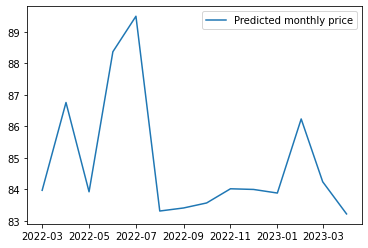

In [849]:
plt.plot(predicted_cases, label='Predicted monthly price')
plt.legend();

In [850]:
preds_ = pd.DataFrame(predicted_cases)
data.index = pd.to_datetime(data.index)

In [851]:
preds_

,0
2022-03-01,83.97221
2022-04-01,86.75923
2022-05-01,83.92537
2022-06-01,88.37037
2022-07-01,89.49682
2022-08-01,83.31516
2022-09-01,83.41213
2022-10-01,83.57120
2022-11-01,84.02119
2022-12-01,83.99998


In [855]:
y = pd.DataFrame(data =df['수원시'][:-1].values,index = data.index)
y.index.name = ''
y

,0
,
2013-01-01,63.40000
2013-02-01,63.30000
2013-03-01,63.20000
2013-04-01,63.30000
2013-05-01,63.40000
...,...
2021-10-01,108.40000
2021-11-01,109.50000
2021-12-01,109.80000


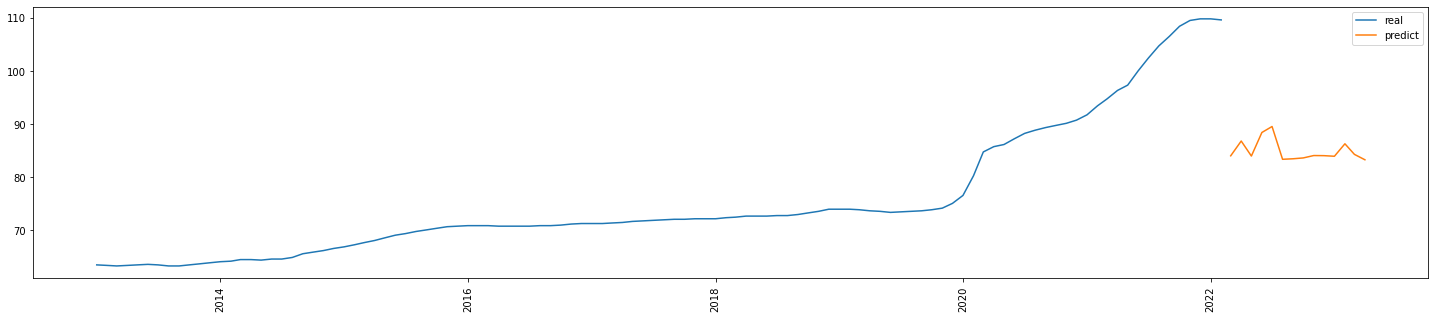

In [856]:
plt.figure(figsize=(25,5))
plt.plot(y,label='real')
plt.plot(preds_, label='predict')
plt.xticks(rotation=90)


plt.legend()